<a href="https://colab.research.google.com/github/Xenu47/mo_cw/blob/main/%D0%A1%D1%82%D0%BE%D1%80%D0%BE%D0%B6%D1%83%D0%BA_%D0%90%D0%BD%D1%82%D0%BE%D0%BD%2C_%D0%9A%D0%9C_83%2C_%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# **Сторожук Антон, КМ-83. Дослідження збіжності метода Хука-Дживса**

## Зміст

* Зміст
* Постановка задачі
* Теоретичні відомості 
* Вирішення задачі
  * Імпорт бібліотек
  * Створення функцій
  * Задання констант
  * Виконання розрахунків
* Виведення результатів
* Висновки
* Корисні посилання 



## Постановка задачі

Дослідити збіжність метода Хука-Дживса при мінімізації функції Розенброка в залежності від:
1. Значення початкового кроку $\|\Delta x\|$.
2. Параметрів методу.
3. Вигляду критерію закінчення (
$\begin{cases}
\frac{\|x^{k+1}-x^k\|}{\|x^k\|} &\leq \epsilon \\
|f(x^{k+1}) - f(x^k)| &\leq \epsilon \\ 
\end{cases}$
або $\|\Delta x\| \leq \epsilon$).
4. Модифікацій методу.

## Теоретичні відомості

### Функція Розенброка

Функція Розенброка, є класичною тестовою функцією в теорії оптимізації. Іноді її називають функцією банана Розенброка через форму її контурних ліній. Глобальний мінімум знаходиться в точці (1,1), яка лежить у довгій вузькій долині.

Тестова функція Розенброка, яка використовується при дослідженні методів для
вирішення задач безумовної оптимізації:

$f(x_1, x_2) = 100(x_2-x_1^2)^2 + (1-x_2)^2; x^{(0)}=(-1,2;0,0)$

### Метод Хука–Дживса

Метод Хука–Дживса (англ. Hooke — Jeeves) або пошук за зразком (англ. Pattern search) так само, як і метод Нелдера–Міда, призначений для пошуку безумовного локального екстремуму функції і відноситься до прямих методів, тобто спирається безпосередньо на значення функції.

Переваги алгоритму:
* властивість «прискорюватися», що сприяє підвищенню його загальної ефективності
* можливість отримання за його допомогою наближеного рішення, якість якого безупинно підвищується на всіх стадіях чисельного рішення
* проста стратегія пошуку і невеликий обсяг необхідної пам'яті

Недоліки алгоритму:
* алгоритм заснований на циклічному русі по координатам, що може привести до виродження алгоритму в нескінченну послідовність пошуків через дослідження без пошуку за зразком
* іноді розв'язком може стати локальний мінімум, а не глобальний, якщо на досліджуваній області присутні кілька мінімумів

Алгоритм складається з двох фаз:
* Досліджуючий пошук - орієнтований на виявлення характеру локальної поведінки цільової функції та визначення нарямку уздовж «ярів».
* Пошук по зразку - використовує інформацію, одержану після проведення досліджуючого пошуку для руху по «ярам».

![xp.png](https://drive.google.com/uc?id=1_Tb_FxUptKw5tej2O3T3MezJnDpXifaH)

Якщо значення функції в новій точці менше за значення функції в минулій точці, знайденій по зразку то застосовується зменшення значень вектора приросуту:

![delta.png](https://drive.google.com/uc?id=1JVSr8LU0vyB-BUxjGKbNVSfJY08O9kU9)

Графіки:

![graph.png](https://drive.google.com/uc?id=1Uj9hVDb0M-HLKMQpqsE7t7FG9CWuHDbF)



## Вирішення задачі

### Імпорт бібліотек

In [38]:
from sympy import symbols, Eq, N
from sympy.solvers import solve
import numpy as np
import math
from IPython.display import Markdown
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

### Створення функцій

In [39]:
#@title Значення функції в точці
def f(x):
    result = function.subs([(x1, x[0]), (x2, x[1])])
    return N(result, 3)

In [40]:
#@title Досліджуючий пошук
def exploratory_search(x, delta_x, list_of_x, silent=False):
    sign = '+'
    f_x = f(x)
    xi, di, ki = symbols('xi di ki')
    eq = xi + di*(ki)
    new_x = x.copy()
    new_f_x = list()
    index = len(list_of_x)
    for i in range(2):
        for j in range(2):
            plus_minus = ((-1)**(2*i+j))
            eq_result = eq.subs(xi, x[i]).subs(di, delta_x[i]).subs(ki, plus_minus) # x[i] +- delta[i]
            res = N( eq_result, 3)
            new_x[i] = res
            func = f(new_x)
            new_f_x.append(func)
            if not silent:
                display(Markdown(rf'$ x_{i+1}^{index} = {x[i]} {"+" if plus_minus>0 else "-"} {delta_x[i]} = {N(res, 3)}; f({new_x}) = {func} {"<" if func<f_x else ">"} {f_x}$'))
        if new_f_x[2*i] < f_x:
            new_x[i] = N(new_x[i] + 2*delta_x[i], 3)
    list_of_x.append(new_x)
    return new_x

In [41]:
#@title Пошук по зразку
def get_xp(list_of_x):
    x_current = list_of_x[-1]
    x_last = list_of_x[-2]
    xp = [2*x_current[i] - x_last[i] for i in range(2)]
    return [N(q, 3) for q in xp]

In [71]:
#@title Виведення графіку
def make_graph(list_of_x):
    color = [q for q in range(len(list_of_x))]
    xs = [q[0] for q in list_of_x]
    ys = [q[1] for q in list_of_x]
    plt.scatter(xs, ys, c = color, cmap ='cividis')
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.show()

In [67]:
#@title Метод Хука-Дживса з покроковим текстовим виводом
def solve_hooke_jeeves(function, x_0, base_delta_x, epsilon, cond):
    list_of_x = [x_0]
    list_of_x_back = list()
    delta_x = base_delta_x.copy()
    bonus=0

    display(Markdown(rf'Мінімізувати функцію: ${str(function).replace("**", "^").replace("x", "x_")}$'))
    display(Markdown(rf'Початкова точка: $x^0 = {x_0}$'))
    display(Markdown(rf'Значення приросту: $\Delta x = {base_delta_x}$'))
    display(Markdown(rf'Значення функції: $f(x^0) = {f(x_0)}$'))
    print()


    display(Markdown(rf'Ітерація 1:'))
    display(Markdown(r'Проводиться досліджуючий пошук навколо першої базисної точки $x^0$'))
    x_1 = exploratory_search(x_0, delta_x, list_of_x)
    xp = get_xp(list_of_x)

    display(Markdown(rf'Отримана точка $x^1 = {x_1}$'))
    display(Markdown(rf'$x_0 = {list_of_x[-2]}$ - базисна'))
    display(Markdown(rf'$x_1 = {x_1}$ - поточна базисна'))
    display(Markdown(rf'$x_p^1 = 2x^1 - x^0 = {xp}$'))
    display(Markdown(rf'$f(x_p^1) = {f(xp)}$'))
    print('\n')
    make_graph(list_of_x)

    i = 0
    exit_cond_1 = np.linalg.norm(delta_x) <= epsilon
    first_cond = np.linalg.norm(np.array(np.subtract(list_of_x[-1],list_of_x[-2]), dtype=np.float64))/np.linalg.norm(np.array(list_of_x[-2], dtype=np.float64)) <= epsilon
    second_cond = np.absolute(f(list_of_x[-1]) - f(list_of_x[-2])) <= epsilon
    exit_cond_2 = first_cond and second_cond
    exit_cond = exit_cond_1 if cond == 1 else exit_cond_2
    while not exit_cond:
        i+=1
        
        display(Markdown(rf'Ітерація {i+1+bonus}:'))
        xn = exploratory_search(xp, delta_x, list_of_x)
        display(Markdown(rf'Проводиться досліджуючий пошук навколо точки $x_p^{i}$'))
        display(Markdown(rf'Отримана точка $x^{i+1} = {xn}$'))

        exit_cond_1 = np.linalg.norm(delta_x) <= epsilon
        first_cond = np.linalg.norm(np.array(np.subtract(list_of_x[-1],list_of_x[-2]), dtype=np.float64))/np.linalg.norm(np.array(list_of_x[-2], dtype=np.float64)) <= epsilon
        second_cond = np.absolute(f(list_of_x[-1]) - f(list_of_x[-2])) <= epsilon
        exit_cond_2 = first_cond and second_cond
        exit_cond = exit_cond_1 if cond == 1 else exit_cond_2


        if f(list_of_x[-1]) < f(list_of_x[-2]):
            xp = get_xp(list_of_x)

            display(Markdown(rf'Оскільки $f({list_of_x[-1]}) = {f(list_of_x[-1])} < f({list_of_x[-2]}) = {f(list_of_x[-2])}$ $\Rightarrow$'))
            display(Markdown(rf'$x_{i} = {list_of_x[-2]}$ - базисна'))
            display(Markdown(rf'$x_{i+1} = {xn}$ - поточна базисна'))
            if exit_cond:
                make_graph(list_of_x)
                break
            display(Markdown(rf'З поточної базисної точки $x^{i+1}$ проводиться пошук за зразком:'))
            display(Markdown(rf'$x_p^{i+1} = 2x^{i+1} - x^{i} = {xp}$'))
            display(Markdown(rf'$f(x_p^{i+1}) = {f(xp)}$'))
        
        else:
            delta_x = [x/2 for x in delta_x]
            make_graph(list_of_x)
            
            display(Markdown(rf'**Оскільки** $f({list_of_x[-1]}) = {f(list_of_x[-1])} > f({list_of_x[-2]}) = {f(list_of_x[-2])}$ $\Rightarrow$'))
            display(Markdown(rf'Пошук не є успішним, необхідно зменшити значення приросту:'))
            display(Markdown(r'$\Delta x_{new} = \frac{\Delta x_{last}}{2} =$'+rf'{delta_x}'))
            display(Markdown(rf'І провести досліджуючий пошук навколо останньої базисної точки $x^{i-1} = {list_of_x[-3]}$'))
            print('\n')

            list_of_x_back = list_of_x.copy()
            list_of_x = list_of_x[:-2]
            i = i-2
            bonus = 2
            xp = list_of_x[-1]
            continue

        make_graph(list_of_x)
        print('\n')
    return list_of_x[-1]

In [43]:
#@title Метод Хука-Дживса без покрокового текстового виводу
#@markdown Ідентичній попередньому, але без тексту
def solve_hooke_jeeves_silent(function, x_0, base_delta_x, epsilon, cond):
    list_of_x = [x_0]
    list_of_x_back = list()
    delta_x = base_delta_x.copy()
    bonus=0

    x_1 = exploratory_search(x_0, delta_x, list_of_x, True)
    xp = get_xp(list_of_x)

    i = 0
    exit_cond_1 = np.linalg.norm(delta_x) <= epsilon
    first_cond = np.linalg.norm(np.array(np.subtract(list_of_x[-1],list_of_x[-2]), dtype=np.float64))/np.linalg.norm(np.array(list_of_x[-2], dtype=np.float64)) <= epsilon
    second_cond = np.absolute(f(list_of_x[-1]) - f(list_of_x[-2])) <= epsilon
    exit_cond_2 = first_cond and second_cond
    exit_cond = exit_cond_1 if cond == 1 else exit_cond_2
    while not exit_cond:
        i+=1
        
        xn = exploratory_search(xp, delta_x, list_of_x, True)

        exit_cond_1 = np.linalg.norm(delta_x) <= epsilon
        first_cond = np.linalg.norm(np.array(np.subtract(list_of_x[-1],list_of_x[-2]), dtype=np.float64))/np.linalg.norm(np.array(list_of_x[-2], dtype=np.float64)) <= epsilon
        second_cond = np.absolute(f(list_of_x[-1]) - f(list_of_x[-2])) <= epsilon
        exit_cond_2 = first_cond and second_cond
        exit_cond = exit_cond_1 if cond == 1 else exit_cond_2
        
        if f(list_of_x[-1]) < f(list_of_x[-2]):
            xp = get_xp(list_of_x)
            if exit_cond:
                break
        else:
            delta_x = [x/2 for x in delta_x]
            list_of_x_back = list_of_x.copy()
            list_of_x = list_of_x[:-2]
            i = i-2
            bonus = 2
            xp = list_of_x[-1]
            continue
    return list_of_x[-1]

In [64]:
#@title Задання констант
x1, x2 = symbols('x1 x2')
function = 100*(x2-x1**2)**2 + (1-x2)**2
x_0 = [-1.2,0.0]
base_delta_x = [0.6,0.8]
epsilon = 0.5
exit_condition = 2 # 1 == ||delta x|| <= epsilon

<IPython.core.display.Javascript object>

Мінімізувати функцію: $(1 - x_2)^2 + 100*(-x_1^2 + x_2)^2$

Початкова точка: $x^0 = [-1.2, 0.0]$

Значення приросту: $\Delta x = [0.6, 0.8]$

Значення функції: $f(x^0) = 208$

Ітерація 1:

Проводиться досліджуючий пошук навколо першої базисної точки $x^0$

$ x_1^1 = -1.2 + 0.6 = -0.600; f([-0.600, 0.0]) = 14.0 < 208$

$ x_1^1 = -1.2 - 0.6 = -1.80; f([-1.80, 0.0]) = 1.05E+3 > 208$

$ x_2^1 = 0.0 + 0.8 = 0.800; f([-0.600, 0.800]) = 19.4 < 208$

$ x_2^1 = 0.0 - 0.8 = -0.800; f([-0.600, -0.800]) = 138 < 208$

Отримана точка $x^1 = [-0.600, 0.800]$

$x_0 = [-1.2, 0.0]$ - базисна

$x_1 = [-0.600, 0.800]$ - поточна базисна

$x_p^1 = 2x^1 - x^0 = [-0.000195, 1.60]$

$f(x_p^1) = 256$

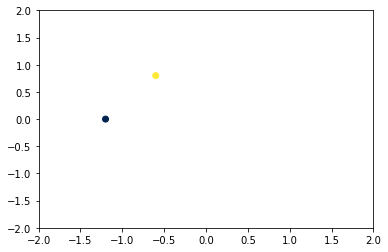

Ітерація 2:

$ x_1^2 = -0.000195 + 0.6 = 0.600; f([0.600, 1.60]) = 154 < 256$

$ x_1^2 = -0.000195 - 0.6 = -0.600; f([-0.600, 1.60]) = 154 < 256$

$ x_2^2 = 1.60 + 0.8 = 2.40; f([0.600, 2.40]) = 418 > 256$

$ x_2^2 = 1.60 - 0.8 = 0.800; f([0.600, 0.800]) = 19.4 < 256$

Проводиться досліджуючий пошук навколо точки $x_p^1$

Отримана точка $x^2 = [0.600, 0.800]$

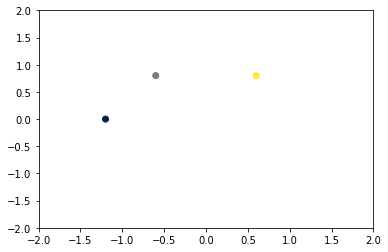

**Оскільки** $f([0.600, 0.800]) = 19.4 > f([-0.600, 0.800]) = 19.4$ $\Rightarrow$

Пошук не є успішним, необхідно зменшити значення приросту:

$\Delta x_{new} = \frac{\Delta x_{last}}{2} =$[0.3, 0.4]

І провести досліджуючий пошук навколо останньої базисної точки $x^0 = [-1.2, 0.0]$

Ітерація 3:

$ x_1^1 = -1.2 + 0.3 = -0.900; f([-0.900, 0.0]) = 66.6 < 208$

$ x_1^1 = -1.2 - 0.3 = -1.50; f([-1.50, 0.0]) = 507 > 208$

$ x_2^1 = 0.0 + 0.4 = 0.400; f([-0.900, 0.400]) = 17.2 < 208$

$ x_2^1 = 0.0 - 0.4 = -0.400; f([-0.900, -0.400]) = 148 < 208$

Проводиться досліджуючий пошук навколо точки $x_p^0$

Отримана точка $x^1 = [-0.900, 0.400]$

Оскільки $f([-0.900, 0.400]) = 17.2 < f([-1.2, 0.0]) = 208$ $\Rightarrow$

$x_0 = [-1.2, 0.0]$ - базисна

$x_1 = [-0.900, 0.400]$ - поточна базисна

З поточної базисної точки $x^1$ проводиться пошук за зразком:

$x_p^1 = 2x^1 - x^0 = [-0.600, 0.800]$

$f(x_p^1) = 19.4$

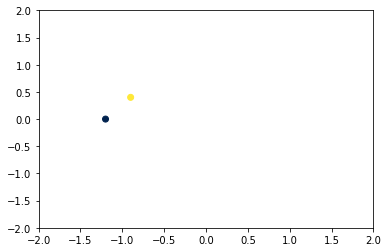

Ітерація 4:

$ x_1^2 = -0.600 + 0.3 = -0.300; f([-0.300, 0.800]) = 50.4 > 19.4$

$ x_1^2 = -0.600 - 0.3 = -0.900; f([-0.900, 0.800]) = 0.0508 < 19.4$

$ x_2^2 = 0.800 + 0.4 = 1.20; f([-0.900, 1.20]) = 15.2 < 19.4$

$ x_2^2 = 0.800 - 0.4 = 0.400; f([-0.900, 0.400]) = 17.2 < 19.4$

Проводиться досліджуючий пошук навколо точки $x_p^1$

Отримана точка $x^2 = [-0.900, 1.20]$

Оскільки $f([-0.900, 1.20]) = 15.2 < f([-0.900, 0.400]) = 17.2$ $\Rightarrow$

$x_1 = [-0.900, 0.400]$ - базисна

$x_2 = [-0.900, 1.20]$ - поточна базисна

З поточної базисної точки $x^2$ проводиться пошук за зразком:

$x_p^2 = 2x^2 - x^1 = [-0.900, 2.00]$

$f(x_p^2) = 142$

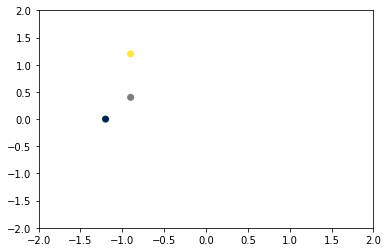

Ітерація 5:

$ x_1^3 = -0.900 + 0.3 = -0.600; f([-0.600, 2.00]) = 270 > 142$

$ x_1^3 = -0.900 - 0.3 = -1.20; f([-1.20, 2.00]) = 32.3 < 142$

$ x_2^3 = 2.00 + 0.4 = 2.40; f([-1.20, 2.40]) = 94.0 < 142$

$ x_2^3 = 2.00 - 0.4 = 1.60; f([-1.20, 1.60]) = 2.91 < 142$

Проводиться досліджуючий пошук навколо точки $x_p^2$

Отримана точка $x^3 = [-1.20, 2.40]$

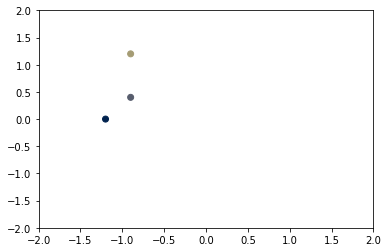

**Оскільки** $f([-1.20, 2.40]) = 94.0 > f([-0.900, 1.20]) = 15.2$ $\Rightarrow$

Пошук не є успішним, необхідно зменшити значення приросту:

$\Delta x_{new} = \frac{\Delta x_{last}}{2} =$[0.15, 0.2]

І провести досліджуючий пошук навколо останньої базисної точки $x^1 = [-0.900, 0.400]$

Ітерація 4:

$ x_1^2 = -0.900 + 0.15 = -0.750; f([-0.750, 0.400]) = 3.00 < 17.2$

$ x_1^2 = -0.900 - 0.15 = -1.05; f([-1.05, 0.400]) = 49.7 > 17.2$

$ x_2^2 = 0.400 + 0.2 = 0.600; f([-0.750, 0.600]) = 0.300 < 17.2$

$ x_2^2 = 0.400 - 0.2 = 0.200; f([-0.750, 0.200]) = 13.8 < 17.2$

Проводиться досліджуючий пошук навколо точки $x_p^1$

Отримана точка $x^2 = [-0.750, 0.600]$

Оскільки $f([-0.750, 0.600]) = 0.300 < f([-0.900, 0.400]) = 17.2$ $\Rightarrow$

$x_1 = [-0.900, 0.400]$ - базисна

$x_2 = [-0.750, 0.600]$ - поточна базисна

З поточної базисної точки $x^2$ проводиться пошук за зразком:

$x_p^2 = 2x^2 - x^1 = [-0.600, 0.800]$

$f(x_p^2) = 19.4$

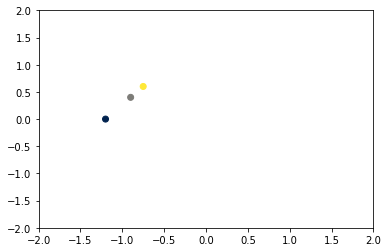

Ітерація 5:

$ x_1^3 = -0.600 + 0.15 = -0.450; f([-0.450, 0.800]) = 35.8 > 19.4$

$ x_1^3 = -0.600 - 0.15 = -0.750; f([-0.750, 0.800]) = 5.68 < 19.4$

$ x_2^3 = 0.800 + 0.2 = 1.00; f([-0.750, 1.00]) = 19.1 < 19.4$

$ x_2^3 = 0.800 - 0.2 = 0.600; f([-0.750, 0.600]) = 0.301 < 19.4$

Проводиться досліджуючий пошук навколо точки $x_p^2$

Отримана точка $x^3 = [-0.750, 1.00]$

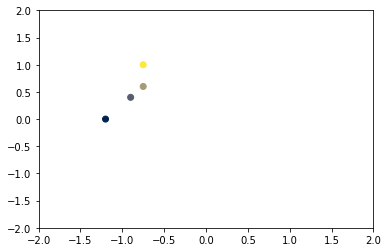

**Оскільки** $f([-0.750, 1.00]) = 19.1 > f([-0.750, 0.600]) = 0.300$ $\Rightarrow$

Пошук не є успішним, необхідно зменшити значення приросту:

$\Delta x_{new} = \frac{\Delta x_{last}}{2} =$[0.075, 0.1]

І провести досліджуючий пошук навколо останньої базисної точки $x^1 = [-0.900, 0.400]$

Ітерація 4:

$ x_1^2 = -0.900 + 0.075 = -0.825; f([-0.825, 0.400]) = 8.25 < 17.2$

$ x_1^2 = -0.900 - 0.075 = -0.975; f([-0.975, 0.400]) = 30.7 > 17.2$

$ x_2^2 = 0.400 + 0.1 = 0.500; f([-0.825, 0.500]) = 3.51 < 17.2$

$ x_2^2 = 0.400 - 0.1 = 0.300; f([-0.825, 0.300]) = 15.0 < 17.2$

Проводиться досліджуючий пошук навколо точки $x_p^1$

Отримана точка $x^2 = [-0.825, 0.500]$

Оскільки $f([-0.825, 0.500]) = 3.51 < f([-0.900, 0.400]) = 17.2$ $\Rightarrow$

$x_1 = [-0.900, 0.400]$ - базисна

$x_2 = [-0.825, 0.500]$ - поточна базисна

З поточної базисної точки $x^2$ проводиться пошук за зразком:

$x_p^2 = 2x^2 - x^1 = [-0.750, 0.600]$

$f(x_p^2) = 0.302$

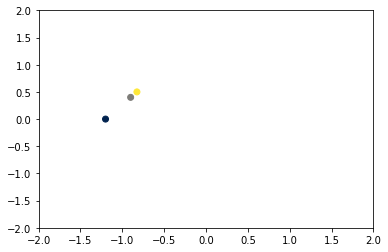

Ітерація 5:

$ x_1^3 = -0.750 + 0.075 = -0.675; f([-0.675, 0.600]) = 2.25 > 0.302$

$ x_1^3 = -0.750 - 0.075 = -0.825; f([-0.825, 0.600]) = 0.803 > 0.302$

$ x_2^3 = 0.600 + 0.1 = 0.700; f([-0.825, 0.700]) = 0.129 < 0.302$

$ x_2^3 = 0.600 - 0.1 = 0.500; f([-0.825, 0.500]) = 3.50 > 0.302$

Проводиться досліджуючий пошук навколо точки $x_p^2$

Отримана точка $x^3 = [-0.825, 0.700]$

Оскільки $f([-0.825, 0.700]) = 0.129 < f([-0.825, 0.500]) = 3.51$ $\Rightarrow$

$x_2 = [-0.825, 0.500]$ - базисна

$x_3 = [-0.825, 0.700]$ - поточна базисна

З поточної базисної точки $x^3$ проводиться пошук за зразком:

$x_p^3 = 2x^3 - x^2 = [-0.825, 0.900]$

$f(x_p^3) = 4.85$

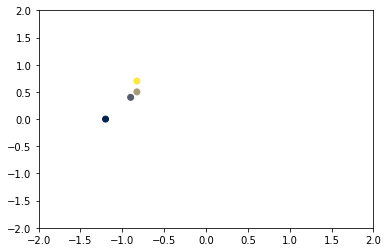

Ітерація 6:

$ x_1^4 = -0.825 + 0.075 = -0.750; f([-0.750, 0.900]) = 11.4 > 4.85$

$ x_1^4 = -0.825 - 0.075 = -0.900; f([-0.900, 0.900]) = 0.835 < 4.85$

$ x_2^4 = 0.900 + 0.1 = 1.00; f([-0.900, 1.00]) = 3.65 < 4.85$

$ x_2^4 = 0.900 - 0.1 = 0.800; f([-0.900, 0.800]) = 0.0483 < 4.85$

Проводиться досліджуючий пошук навколо точки $x_p^3$

Отримана точка $x^4 = [-0.900, 1.00]$

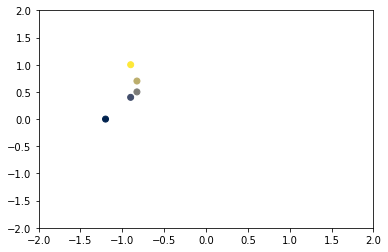

**Оскільки** $f([-0.900, 1.00]) = 3.65 > f([-0.825, 0.700]) = 0.129$ $\Rightarrow$

Пошук не є успішним, необхідно зменшити значення приросту:

$\Delta x_{new} = \frac{\Delta x_{last}}{2} =$[0.0375, 0.05]

І провести досліджуючий пошук навколо останньої базисної точки $x^2 = [-0.825, 0.500]$

Ітерація 5:

$ x_1^3 = -0.825 + 0.0375 = -0.787; f([-0.787, 0.500]) = 1.69 < 3.51$

$ x_1^3 = -0.825 - 0.0375 = -0.862; f([-0.862, 0.500]) = 6.19 > 3.51$

$ x_2^3 = 0.500 + 0.05 = 0.550; f([-0.787, 0.550]) = 0.693 < 3.51$

$ x_2^3 = 0.500 - 0.05 = 0.450; f([-0.787, 0.450]) = 3.20 < 3.51$

Проводиться досліджуючий пошук навколо точки $x_p^2$

Отримана точка $x^3 = [-0.787, 0.550]$

Оскільки $f([-0.787, 0.550]) = 0.693 < f([-0.825, 0.500]) = 3.51$ $\Rightarrow$

$x_2 = [-0.825, 0.500]$ - базисна

$x_3 = [-0.787, 0.550]$ - поточна базисна

З поточної базисної точки $x^3$ проводиться пошук за зразком:

$x_p^3 = 2x^3 - x^2 = [-0.750, 0.600]$

$f(x_p^3) = 0.301$

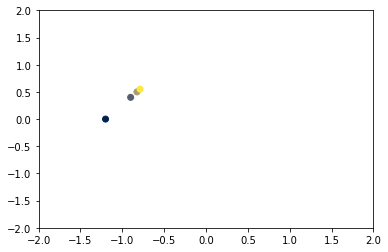

Ітерація 6:

$ x_1^4 = -0.750 + 0.0375 = -0.713; f([-0.713, 0.600]) = 1.01 > 0.301$

$ x_1^4 = -0.750 - 0.0375 = -0.787; f([-0.787, 0.600]) = 0.200 < 0.301$

$ x_2^4 = 0.600 + 0.05 = 0.650; f([-0.787, 0.650]) = 0.213 < 0.301$

$ x_2^4 = 0.600 - 0.05 = 0.550; f([-0.787, 0.550]) = 0.693 > 0.301$

Проводиться досліджуючий пошук навколо точки $x_p^3$

Отримана точка $x^4 = [-0.787, 0.650]$

Оскільки $f([-0.787, 0.650]) = 0.212 < f([-0.787, 0.550]) = 0.693$ $\Rightarrow$

$x_3 = [-0.787, 0.550]$ - базисна

$x_4 = [-0.787, 0.650]$ - поточна базисна

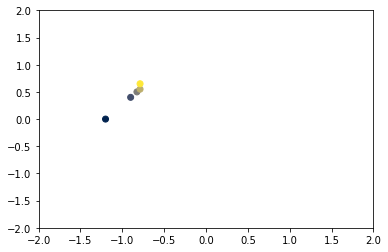

[-0.787, 0.650]

In [72]:
#@title Виконання розрахунків + виведення результатів
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 50000})'''))

solve_hooke_jeeves(function, x_0, base_delta_x, epsilon, exit_condition)

## Виведення результатів

Критерій закінчення - $\begin{cases}\frac{\|x^{k+1}-x^k\|}{\|x^k\|} &\leq \epsilon \\|f(x^{k+1}) - f(x^k)| &\leq \epsilon \\ \end{cases}$

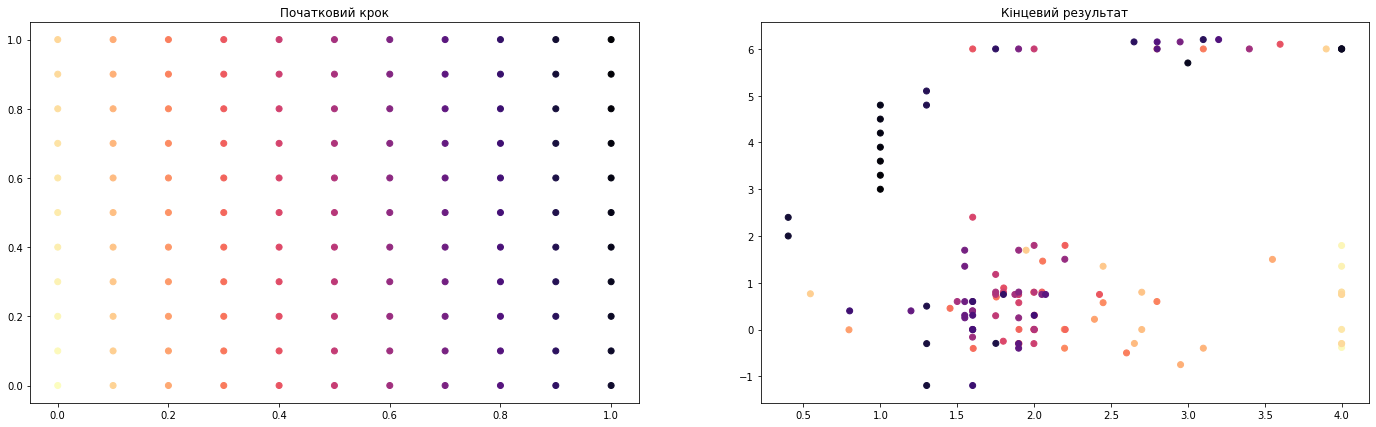

In [46]:
#@title Графік збіжності метода Хука-Дживса при мінімізації функції Розенброка в залежності від значення почачткого кроку і критерію закінчення
display(Markdown(r'Критерій закінчення - $\begin{cases}\frac{\|x^{k+1}-x^k\|}{\|x^k\|} &\leq \epsilon \\|f(x^{k+1}) - f(x^k)| &\leq \epsilon \\ \end{cases}$'))

exit_condition = 2
values = list()
for i in range(11):
    for j in range(11):
        temp = [i/10,j/10]
        func_result = solve_hooke_jeeves_silent(function, x_0, temp, epsilon, exit_condition)
        temp.append(func_result)
        values.append(temp)

x = [x[0] for x in values]
y = [x[1] for x in values]
z = [x[2] for x in values]

fig = plt.figure(figsize=(24, 7))

color = [q for q in range(len(z))]
color.reverse()

plt.subplot(1, 2, 1)
plt.scatter(x , y, c = color, cmap ='magma')
plt.title('Початковий крок')

plt.subplot(1, 2, 2)
zx = [q[0] for q in z]
zy = [q[1] for q in z]
plt.scatter(zx , zy, c = color, cmap ='magma')
plt.title('Кінцевий результат')
plt.show()

Критерій закінчення - $\|\Delta x\| \leq \epsilon$

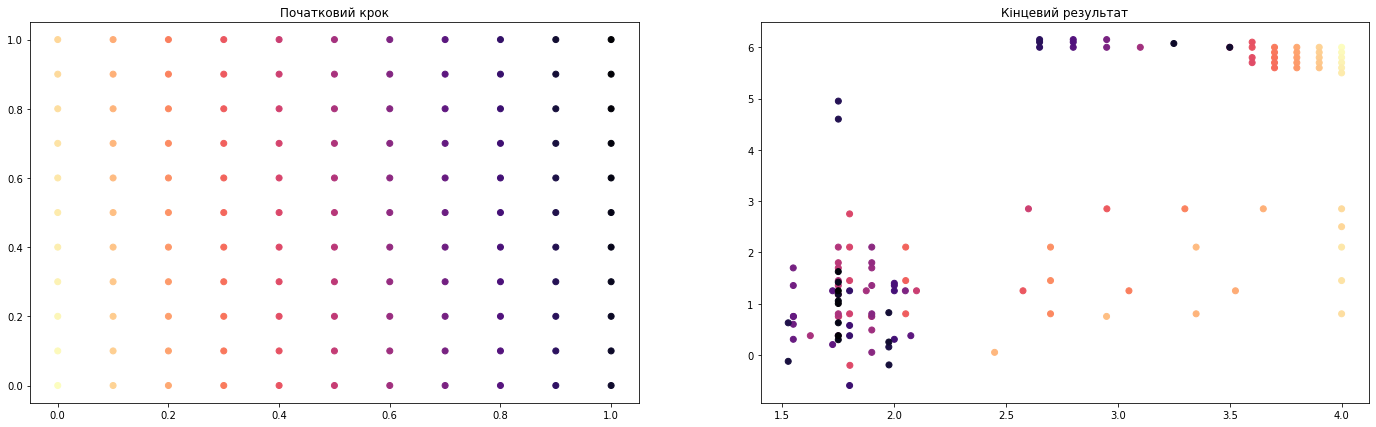

In [47]:
#@title Графік збіжності метода Хука-Дживса при мінімізації функції Розенброка в залежності від значення почачткого кроку і критерію закінчення
display(Markdown(r'Критерій закінчення - $\|\Delta x\| \leq \epsilon$'))

exit_condition = 1
values = list()
for i in range(11):
    for j in range(11):
        temp = [i/10,j/10]
        func_result = solve_hooke_jeeves_silent(function, x_0, temp, epsilon, exit_condition)
        temp.append(func_result)
        values.append(temp)

x = [x[0] for x in values]
y = [x[1] for x in values]
z = [x[2] for x in values]

fig = plt.figure(figsize=(24, 7))

color = [q for q in range(len(z))]
color.reverse()

plt.subplot(1, 2, 1)
plt.scatter(x , y, c = color, cmap ='magma')
plt.title('Початковий крок')

plt.subplot(1, 2, 2)
zx = [q[0] for q in z]
zy = [q[1] for q in z]
plt.scatter(zx , zy, c = color, cmap ='magma')
plt.title('Кінцевий результат')
plt.show()

## Висновки

В ході даної роботи було досліджено збіжність метода Хука-Дживса при мінімізації функції Розенброка.

Також було досліджено поведінку функціх при різних критеріях закінчення і опираючись на вищевказані графіки, можна зробити висновок, що використовуючи критерій закінчення 
* $\begin{cases}\frac{\|x^{k+1}-x^k\|}{\|x^k\|} &\leq \epsilon \\|f(x^{k+1}) - f(x^k)| &\leq \epsilon \\ \end{cases}$

функція збігається до мінімуму з меншою швидкістю, ніж використовуючи критерій закінчення 
* $\|\Delta x\| \leq \epsilon$

## Список використаних джерел


1. AMO — Advanced Modeling and Optimization, Volume 11, Number 1 - Department of Mathematics and Statistics, University of Canterbury, 2009 (https://camo.ici.ro/journal/vol11/v11a4.pdf)

2. Numerical Optimization: Penn State Math 555 Lecture Notes - Christopher Griffin, 2012 (http://www.personal.psu.edu/cxg286/Math555.pdf)

3. Банди Б.,Методы оптимизации. Вводный курс. М., 1988 (https://elprivod.nmu.org.ua/files/optimization/Банди_методы%20оптимизации.pdf)

4. Методы оптимизации систем автоматизированого проектирования (http://www.optimizaciya-sapr.narod.ru)

5. Ладогубец Т.С., Методи оптимізації. Практика 2., 2021 (https://drive.google.com/file/d/1OJ0E8cCos0hXFTsM1Cvp08Hyy5KaNQq8/view?usp=sharing)

5. Ладогубец Т.С., Методи оптимізації. Лекція 4., 2021 (https://drive.google.com/file/d/1CTQGX88IPj6HRko77aHITAJ0sWO5Mtqy/view?usp=sharing)
